In [1]:
# importing pandas and numpy for Loading and Inspect the Dataset
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/Users/sayansarkar/Downloads/Linear Regression/50_Startups.csv')

In [4]:
#Overview of column names & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_D_spent        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R_D_spent,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.head()

,R_D_spent,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
df.shape

(50, 5)

In [9]:
# Summary statistics of the dataset

df.describe() # to examine mean, median, standard deviation, etc


,R_D_spent,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
#Data Cleaning & Missing Values
df.isnull().sum() # checking for missing values

R_D_spent          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [11]:
# checking for  Duplicates
duplicates = df[df.duplicated()]
print(duplicates)


# output suggested no duplicated values existed in my data set.


Empty DataFrame
Columns: [R_D_spent, Administration, Marketing_Spend, State, Profit]
Index: []


In [12]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [13]:
df_cleaned = df.drop_duplicates()
print(f"Dataset after removing duplicates: {df_cleaned.shape}")


Dataset after removing duplicates: (50, 5)


In [14]:
# Outlier Detection & Treatment

import seaborn as sns
import matplotlib.pyplot as plt


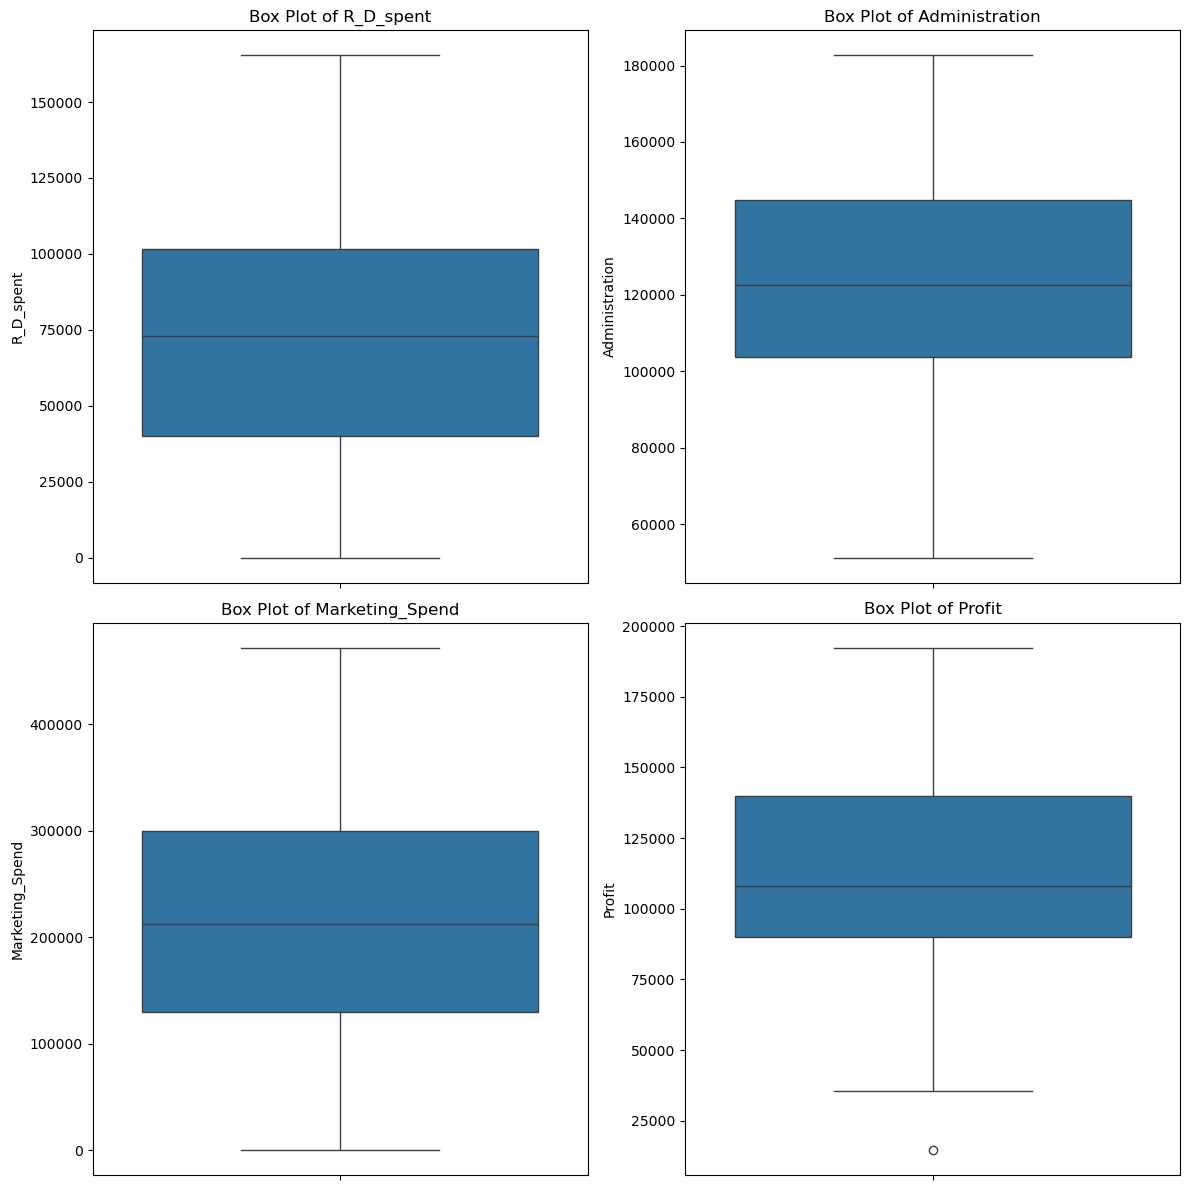

In [17]:
# Plot box plots for each numerical column
features = ['R_D_spent', 'Administration', 'Marketing_Spend', 'Profit']
plt.figure(figsize=(12,12))# Sets the dimensions of the figure in inches.12 refers to the width.12 refers to the height.
#So, the figure will be 12 inches wide and 12 inches tall.


for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [18]:
#Statistical Detection (Z-score)

# read coments below for better under standing
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[['R_D_spent', 'Administration', 'Marketing_Spend', 'Profit']]))
print(z_scores)

# Identify outliers (Threshold: Z-score > 3)
outliers = (z_scores > 3).sum(axis=0)
print(f"Outliers detected in each column:\n{outliers}")

# Explaination

#SciPy is a Python library for scientific computing.
#The stats module provides statistical functions, including Z-score calculations.
#z_scores = np.abs(stats.zscore(df[['R_D_spent', 'Administration', 'Marketing_Spend', 'Profit']]))
# Z-score measures how far a data point is from the mean in terms of standard deviations.
#The formula for Z-score is: Z= X-µ/σ
# where:
#𝑥  is the data point.


#𝜇 is the mean of the column.
 

#𝜎 is the standard deviation.
 

#We apply stats.zscore() to numerical columns to standardize the values.

#Using np.abs() ensures we only get positive values, since negative Z-scores indicate values below the mean.


#A Z-score is used to measure how far a data point deviates from the mean of a dataset in terms of standard deviations. 
#It helps determine whether a value is significantly different from the rest of the data.


#Key Uses of Z-score:
#Outlier Detection 

#If a Z-score is greater than 3 or less than -3, the data point may be an outlier.

#Helps decide whether to remove, transform, or investigate extreme values.

#Standardization 

#Converts data into a common scale without changing its distribution.

#Useful for machine learning models (e.g., regression, clustering).

#Comparing Different Datasets 

#If datasets have different units or scales, Z-score helps compare them consistently.


# A high Z-score means a value is far above the mean, while a low Z-score indicates it's below the mean.



    R_D_spent  Administration  Marketing_Spend    Profit
0    2.016411        0.560753         2.153943  2.011203
1    1.955860        1.082807         1.923600  1.999430
2    1.754364        0.728257         1.626528  1.980842
3    1.554784        0.096365         1.422210  1.776627
4    1.504937        1.079919         1.281528  1.357740
5    1.279800        0.776239         1.254210  1.127250
6    1.340066        0.932147         0.688150  1.105481
7    1.245057        0.871980         0.932186  1.096210
8    1.030369        0.986952         0.830887  1.007470
9    1.091819        0.456640         0.776107  0.946022
10   0.620398        0.387599         0.149807  0.854847
11   0.593085        1.065540         0.319834  0.808168
12   0.443260        0.215449         0.320617  0.741155
13   0.402078        0.510179         0.343957  0.558750
14   1.017181        1.269199         0.375742  0.516026
15   0.897913        0.045868         0.419219  0.448720
16   0.094441        0.009118  

In [19]:
# Exploratory data analysis
# checking for numerical and categorical column.

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

print(f"Numerical Columns: {numerical_columns.tolist()}")
print(f"Categorical Columns: {categorical_columns.tolist()}")




Numerical Columns: ['R_D_spent', 'Administration', 'Marketing_Spend', 'Profit']
Categorical Columns: ['State']


In [20]:
#Understanding the Dataset

#Check data types 
df.dtypes

R_D_spent          float64
Administration     float64
Marketing_Spend    float64
State               object
Profit             float64
dtype: object

In [21]:
#Review shape  to see rows & columns.

df.shape

(50, 5)

In [24]:
# Handling Missing & Duplicate Data

# printFind missing values (df.isnull().sum()).
(df.isnull().sum())

#Identify duplicates (df.duplicated().sum()).
(df.duplicated().sum())

0

In [26]:
#Univariate Analysis (One Variable at a Time)
#Histograms to check distribution (sns.histplot(df['column'])).
#Box plots to detect outliers (sns.boxplot(y=df['column'])).

#Summary statistics (df.describe()).
print(df.columns)  # Lists all column names


Index(['R_D_spent', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')


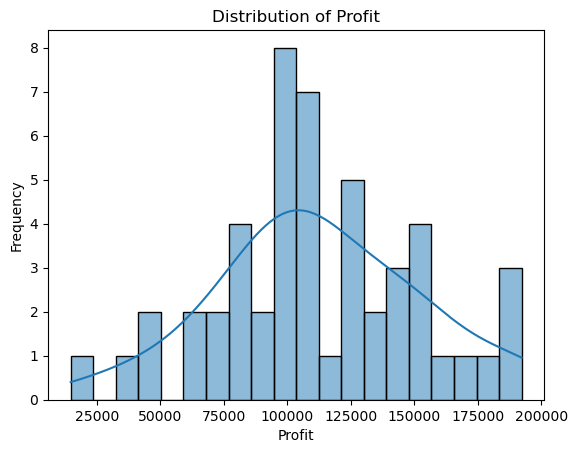

In [27]:
#Univariate Analysis (One Variable at a Time)
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Profit'], bins=20, kde=True)  # Histogram for 'Profit' column
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


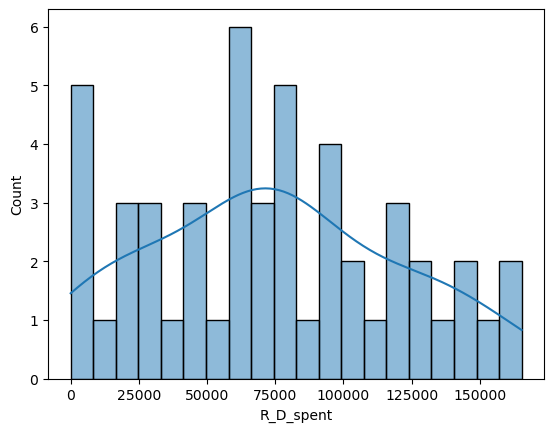

In [28]:
sns.histplot(df['R_D_spent'], bins=20, kde=True)
plt.show()


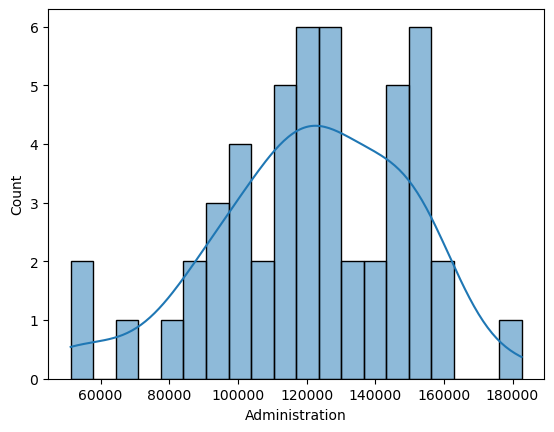

In [29]:
sns.histplot(df['Administration'], bins=20, kde=True)
plt.show()


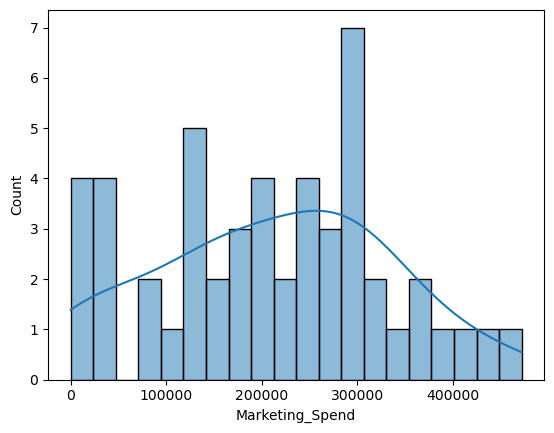

In [32]:
sns.histplot(df['Marketing_Spend'], bins=20, kde=True)
plt.show()


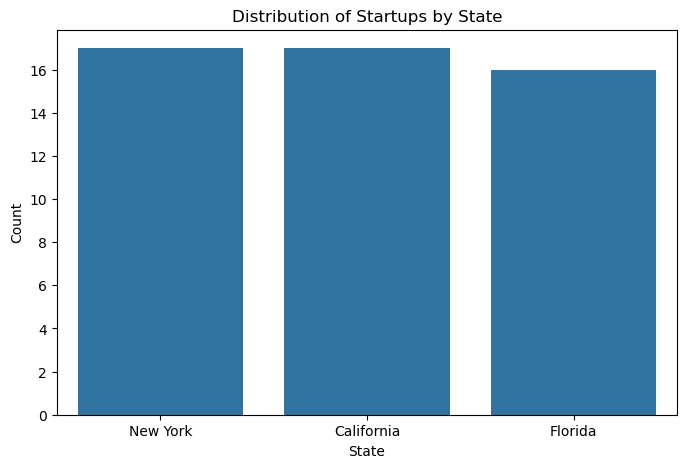

In [33]:
#Visualize Category Distribution (Bar Chart)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x=df['State'])
plt.title('Distribution of Startups by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


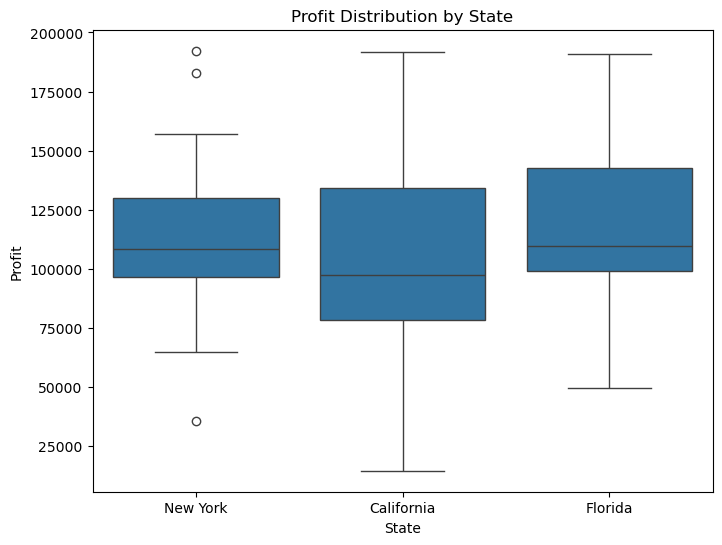

In [34]:
#3. Analyze Impact of State on Profit
plt.figure(figsize=(8,6))
sns.boxplot(x=df['State'], y=df['Profit'])
plt.title('Profit Distribution by State')
plt.xlabel('State')
plt.ylabel('Profit')
plt.show()


ValueError: could not convert string to float: 'New York'

<Figure size 800x600 with 0 Axes>